In [4]:
from deconvolution_network import DeconvNet
from saliency_map import SaliencyMap

In [5]:
import os
import math
import torch
import torchvision
import numpy as np
from tqdm import tqdm
from PIL import Image
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
from collections import OrderedDict
from read_image import read_image, tensor_to_image
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt

tensor(14.4720, grad_fn=<MaxBackward1>)


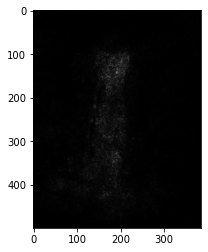

In [148]:
image_path = '../test/b4.jpg'
output_path = '../test/maps/output.jpg'

alexnet = models.vgg13(pretrained=True)
net = SaliencyMap(alexnet)
image = read_image(image_path, 'alexnet')
saliency_map = net(image)
saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min())
saliency_map = Image.fromarray((saliency_map*255).astype(np.uint8))
saliency_map.save(output_path)
plt.imshow(saliency_map, cmap='gray')
plt.show()

In [152]:
a = np.array(saliency_map)

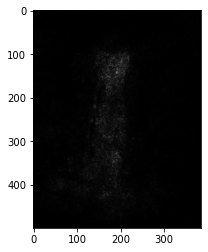

In [153]:
plt.imshow(a, cmap='gray')

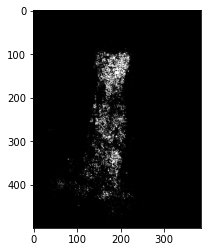

In [154]:
a = (a - a.min()) / (a.max() - a.min())
a[a < 0.05] = 0.0
a[a >= 0.1] = 0.5
plt.imshow(a, cmap='gray')

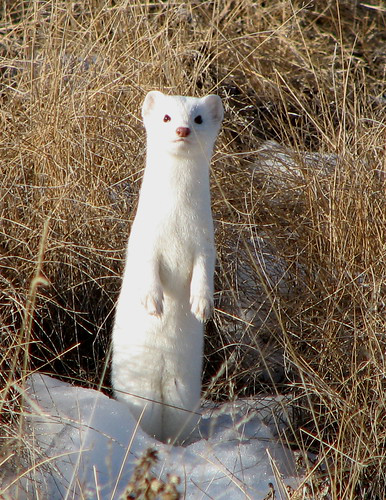

In [155]:
tensor_to_image(image)